## Housing Price Prediction: Real Estate Project


In [1]:
import pandas as pd
import numpy as np

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.shape

(506, 14)

In [4]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


#For Learning purpose we have deleted 5 values of "RM", hence RM has only 501 values (note)

In [6]:
housing['CHAS']

0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Name: CHAS, Length: 506, dtype: int64

In [7]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [8]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.283433,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704109,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.619000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
%matplotlib inline

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

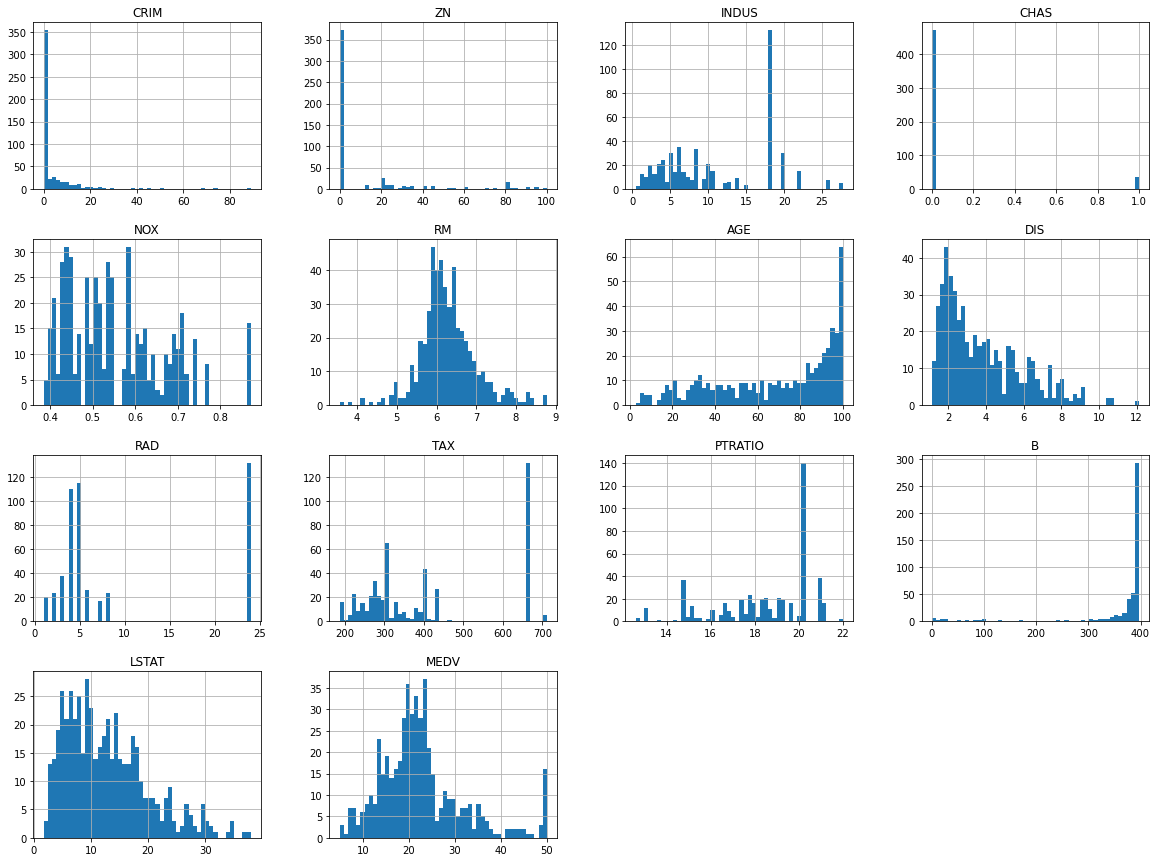

In [10]:
# for plotting histogram
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))

# # Train-Test Splitting

#for learning purpose (How train_test function works internally)

import numpy as np

def split_train_test(data, test_ratio):

    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
train_set, test_set = split_train_test(housing, 0.2)

print(f"Rows in train set:{len(train_set)}\nRows in test set:{len(test_set)}\n")

In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state = 42)
print(f"Rows in train set:{len(train_set)}\nRows in test set:{len(test_set)}\n")

Rows in train set:404
Rows in test set:102



# For dividing train and test sets in a manner that it should represent the whole dataset

    "Stratified ShuffleSplit" cross-validator is used       # Read more on the website

Returns stratified randomized folds. The folds are made by preserving the percentage of samples for each class.

    # 'CHAS' me 0: 471 times hai 1: 35 times hai, train and test ke splitting me 0 aur 1 ki barabar hissedaari honi chahiye
    # Agar jo bhi parameter bahut imp hai usme splitting kuch iss prakaar hi karna hai
    


# For learning purpose
#Traditional way of using  StratifiedShuffleSplit

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits =1, test_size = 0.2, random_state = 42)

for train_index, test_index in split.split(housing, housing['CHAS']):
   
    strat_train_set = housing.loc[train_index]   
    strat_test_set = housing.loc[test_index]

## USE this Method instead
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, random_state=42, stratify=housing["CHAS"])

In [12]:
strat_train_set, strat_test_set = train_test_split( housing, test_size=0.2, random_state=42, stratify=housing["CHAS"])

#try this

strat_test_set.info()

strat_test_set.describe()


In [13]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

Notice from the last Instruction values of 'CHAS' has been divided equally in train_set & test_set

In [14]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

#Note that: 95/7 is almost equal to 376/28, means we have divided 'CHAS' in equal ratio btw train and test data

In [15]:
housing = strat_train_set.copy()     # housing has train dataset now

In [16]:
housing.shape

(404, 14)

# Looking for Correlations

In [17]:
corr_matrix = housing.corr()

# https://www.geeksforgeeks.org/python-pandas-dataframe-corr/

corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.678134
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

Basically we are observing the dependencies of columns w.r.t column 'MEDV'.    
Here we are observing the all column value comparison with respect to 'MEDV'       
As 'MEDV' increses the values of other columns are either incresing or decresing

 1  :  STRONG Positive Correlation  and  
-1 : STRONG Negative Correlation

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

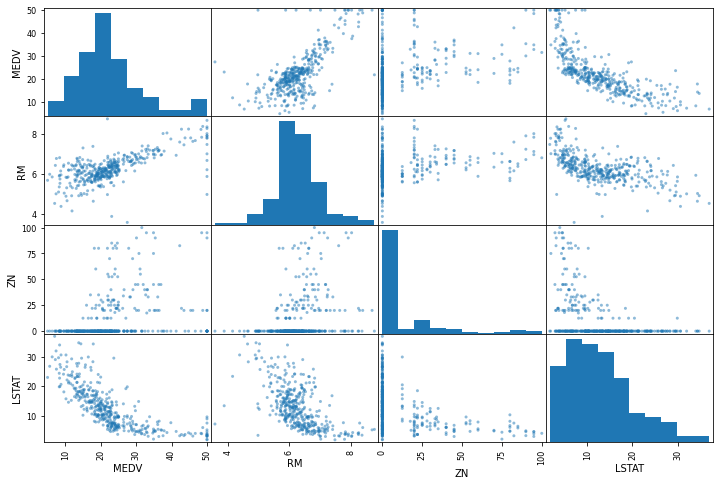

In [18]:
from pandas.plotting import scatter_matrix
attributes = ['MEDV','RM', 'ZN','LSTAT']
scatter_matrix(housing[attributes], figsize = (12,8))

#Here we are plotting the comparison graph of one column to other columns
#Same as the correlation matrix

Here we can see the Strong positive relationship btw "MEDV" and "RM"       
Whereas Strong Negative relationship btw "MEDV" and "LSTAT"

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

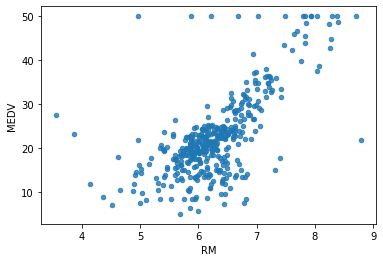

In [19]:
# To visualise more...
housing.plot(kind="scatter",x="RM",y="MEDV", alpha=0.8)

By observing this plot we can visualise it to make a meaningful decision                      
For example we can remove the Outliers from this graph in order to get clean dataset and to achieve more accuracy while prediction                         
(Our model will not get confused because of outlier datapoints)

# Attribute Combination

In [20]:
# Try: Attribute Combination
# housing["TAXRM"] = housing["TAX"]/housing["RM"]
# we are creating another attribute(column) named "TAX/RM" it shows Tax per RM
# Try all
# housing["TAXRM"]
# creating the correlational matrix again. (Notice the newly created attribute "TAXRM")
# corr_matrix = housing.corr()
# corr_matrix['MEDV'].sort_values(ascending=False)
# housing.plot(kind="scatter",x="TAXRM",y="MEDV", alpha=0.8)
# By creating new attibute "TAXRM", we can observe that "TAXRM" has a STRONG Negative Coorelation w.r.t "MEDV".         
# This info is useful in Model Creation

# Label and features segregation

In [21]:
housing = strat_train_set.drop("MEDV", axis = 1)   # drooping "lebel" 
housing_labels = strat_train_set["MEDV"].copy()

## Missing Attributes

#To take care of missing attributes, you have three options:
   1. Get rid of the missing data points # Drop Rows
   2. Get rid of the whole attribute  # Drop Column
   3. Assign some values to the missing attribues eg (0, mean or median)

In [22]:
# Option 1: If missing values are very less eg 5-10

housing.dropna(subset=["RM"])     #dropna used for dropping missing values(rows)    

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13


Notice: we have removed 5 records(rows which has missing values)                      
        Hence we are getting 399 rows here. 

In [23]:
housing.shape   #Notice by removing 5 records, no changes in the original training dataset # Hence 404 records is unchanged 

(404, 13)

Note:                                             
    # To make permanent changes write below query ("inplace = True")                     
    # housing.dropna(subset=["RM"], inplace = True) 

In [24]:
#Option 2: If the column containing missing values is not imp

housing.drop("RM", axis = 1)       # This will remove column 'RM'  (but temporarily)

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,28.9,5.4159,5,287,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,82.6,1.7455,5,403,14.7,88.01,15.02
423,7.05042,0.0,18.10,0,0.614,85.1,2.0218,24,666,20.2,2.52,23.29
98,0.08187,0.0,2.89,0,0.445,36.9,3.4952,2,276,18.0,393.53,3.57
455,4.75237,0.0,18.10,0,0.713,86.5,2.4358,24,666,20.2,50.92,18.13


In [25]:
housing.shape  # Without "inplace = True", original training dataset will remain unchanged

(404, 13)

In [26]:
# Option 3: Assign some values eg 'Median' value

median = housing["RM"].median()   # Computing Median value for replacing the missing values

In [27]:
median

6.209

In [28]:
housing["RM"].fillna(median)
# original training dataset will remain unchanged # Original column 'RM' will be having 399 records only

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [29]:
housing.shape

(404, 13)

In [30]:
housing.describe()     #Before we started filling missing attributes (Imputing)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278341,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.714948,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Using Imputer

In [31]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")      # Imputation transformer for completing missing values.
imputer.fit(housing)                              # Fit the imputer on X.

#imputer housing data me fixed ho gaya

SimpleImputer(strategy='median')

In [32]:
imputer.statistics_    # will print the values calculated by the Imputer for all columns

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

Note: although we have missing values in "RM" attribute only, but using Imputer methedology we calculate values for all columns to fill the missing fields

In [33]:
X= imputer.transform(housing)                       # transform(X):  Impute all missing values in X.

In [34]:
housing_tr = pd.DataFrame(X, columns = housing.columns)   
# creating new dataframe for visualization 

In [35]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.277483,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.710540,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.629250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


Note: By above command we added values in the missing fileds of "RM" columns by using Imputer                    
Similarly it would have done for other columns if they had missing values

Notice: "RM" is having 506 fileds now

In [36]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278341,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.714948,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-Learn Design

Primarly, three types of ojects
1. Estimators: It estimates some parameters based on a dataset. Eg. Imputer                               
    It has a fit method and transfoem method                                            
    Fit method: Fits the dataset and calculates internal parameters
    
        
2. Transformers: transform method takes input and returns output based on the learnings from fit()                        
    It also has a convenience function called fit_transform() which fits and then transforms.  
    
    
3. Predictors: for predicting values for unseen dataset(new values).                                                
    Eg. LinearRegression model, KNN                                                                 
    fit() and predict() are two commom functions. It also give some score function which will evaluate your prediction.

## Feature Scaling
Feature scaling: Except some algorithm in ML most work works better when numerical attributes are in same scaling.

Write a code in such a way such that if we need to modify or make some neccessary changes in the model, it can be easily implemented.                                                                       # Model, Code, Strategy Changes.                                                 
For obtaining this we use feature scaling

Primarily, two types of feature scaling methods:                                                        
    
    1. Main-Max scaling (Normalisation)    
        (Value-min)/(max-min)                                                                                        
        Value will come in one scale (between 0 to 1)
        Sklearn provies a class called MinMaxScaler for this
        
    2. Standardization
        (Value-mean)/std
        Sklearn provides a class StandardScaler for this

## Creating a Pipeline
 

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy = "median")),
    #     ....... as many factors as you want in your pipeline (for modifying the dataset)
    ('std_scaler',StandardScaler()),  
     ])

In [38]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [39]:
housing_num_tr   #NumPy array   # No need to convert into pandas dataframe

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [40]:
housing_num_tr.shape

(404, 13)

In [41]:
# Try: It will show the final dataset after imuting and scaling
# housing_tr1 = pd.DataFrame(housing_num_tr, columns = housing.columns)  
# housing_tr1.head()

 ## Selecting a desired model for House Price Prediction

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#Choose Model

#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()

model.fit(housing_num_tr, housing_labels)   

RandomForestRegressor()

In [43]:
some_data = housing.iloc[:5]   # thoda sa data lekar check karna ki model kaisa kaam kar raha hai

In [44]:
some_labels = housing_labels[:5]

In [45]:
prepared_data = my_pipeline.transform(some_data)

In [46]:
model.predict(prepared_data) #Predicted values   # predicting the values for some_data

array([22.249, 25.299, 16.448, 23.287, 23.654])

In [47]:
some_labels    #Expected values # Here we are companing predicted values vs actual expected data   

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
Name: MEDV, dtype: float64

In [48]:
list(some_labels ) 

[21.9, 24.5, 16.7, 23.1, 23.0]

#  Evaluating the model
For checking accuracy and error

In [49]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)

mse = mean_squared_error(housing_labels, housing_predictions) # copmaring prediction vs actual 

rmse = np.sqrt(mse)     # Root mean square error

In [50]:
rmse

1.2294799180189486

#As rmse = 0, this is Overfitting

# Using Better evaluation technique- Cross Validation

In [51]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring ="neg_mean_squared_error", cv =10)
# scoring me negative rmse jata hai
# cv = 10 means hum 10 folds lena chahte hai

rmse_scores = np.sqrt(-scores)   # because negative ka square root nahi milta

In [52]:
rmse_scores

array([2.85672713, 2.8476506 , 4.5870248 , 2.57069196, 3.81778196,
       2.68017922, 4.80453461, 3.29930874, 3.32339098, 3.50554508])

In [53]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standared Deviation:", scores.std())
print_scores(rmse_scores)    

Scores: [2.85672713 2.8476506  4.5870248  2.57069196 3.81778196 2.68017922
 4.80453461 3.29930874 3.32339098 3.50554508]
Mean: 3.429283508484829
Standared Deviation: 0.7335522047908298


Note: Convert the code in python file and run pipeline using Visual Studio Code

## Saving the model

In [54]:
from joblib import dump, load
dump(model, 'House_Price.joblib') 

['House_Price.joblib']

## Testing the model on test data

In [55]:
X_test = strat_test_set.drop("MEDV", axis =1)
Y_test = strat_test_set['MEDV'].copy()

X_test_prepared = my_pipeline.transform(X_test)

In [56]:
Final_predictions = model.predict(X_test_prepared)

In [57]:
print(Final_predictions, list(Y_test))

[23.939 11.637 25.397 22.057 18.205 14.869 20.102 14.508 30.739 40.938
 19.782 12.314 25.66  23.428 19.524 10.99  30.815 14.053 23.459 18.957
 19.986 18.088 16.434 21.994 18.442 31.147 15.914 32.61   8.587 33.385
 24.978 21.479 22.908 11.049 20.734 11.147 42.834 24.503 23.865 41.995
 24.015 28.773 20.666 21.07  19.335 33.385 45.52  20.337 20.062 21.667
 21.411 14.803 21.281 15.169 24.984 33.503 42.619 29.19  19.225 20.775
 47.332  9.571 18.964 27.643 14.734 32.938 20.171 18.119 19.099 33.788
 27.669 23.02  21.257 22.379 34.254 12.579 16.203 20.256 21.18  21.07
 22.788 20.891 14.115 23.062 20.641 21.297 14.505 20.999 21.57  23.39
 18.383 27.498  7.525 26.283 18.487 29.064 20.014 30.708 14.453 27.019
 21.19  20.742] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1, 

In [58]:
final_mse = mean_squared_error(Y_test, Final_predictions) # copmaring prediction vs actual 

final_rmse = np.sqrt(mse)

In [59]:
final_rmse

1.2294799180189486

In [60]:
prepared_data[0]


array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23882221, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])